In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.neighbors import KNeighborsClassifier as KNN

In [2]:
from pydataset import data

In [3]:
# Planning: See if I can predict what species of iris flower
# I am observing based on measurements taken on the plant petals and
# sepals

In [4]:
# acquire:
df = data('iris')

In [5]:
df.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [ ]:
# preparation

In [6]:
df.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'species']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  150 non-null    float64
 1   sepal_wid  150 non-null    float64
 2   petal_len  150 non-null    float64
 3   petal_wid  150 non-null    float64
 4   species    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [9]:
data('iris', show_doc=True)

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

In [10]:
# exploration seemed indicative 
# of petal length and width being more valuable 
# than sepal length and width

In [11]:
train_val, test = train_test_split(df,
                                  train_size=0.8,
                                  stratify=df.species,
                                  random_state=1349)

train, validate = train_test_split(train_val,
                                  train_size=0.7,
                                  stratify=train_val.species,
                                  random_state=1349)

In [12]:
train.shape, validate.shape, test.shape

((84, 5), (36, 5), (30, 5))

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

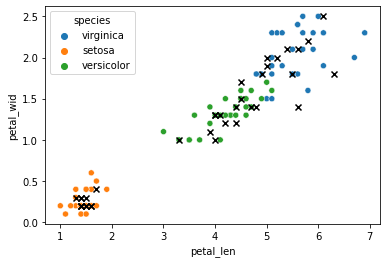

In [16]:
sns.scatterplot(x='petal_len',
                y='petal_wid',
                hue='species',
                data=train)
plt.scatter(validate.petal_len, validate.petal_wid, marker='x', c='black')
plt.show()

In [17]:
# 
# euclidean distance:
# sqrt( (x2 - x1)^2 + (y2 - y1)^2)

In [18]:
# important things:
# units are big! are units similar? do we need to scale them?

In [19]:
# lets build our first scaler!

In [20]:
# make the thing
# fit the thing
# use the thing

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
# make the thing:
myscaler = MinMaxScaler()

In [24]:
# fit the thing:
train.head()

,sepal_len,sepal_wid,petal_len,petal_wid,species
139,6.0,3.0,4.8,1.8,virginica
8,5.0,3.4,1.5,0.2,setosa
80,5.7,2.6,3.5,1.0,versicolor
75,6.4,2.9,4.3,1.3,versicolor
98,6.2,2.9,4.3,1.3,versicolor


In [25]:
X_train, y_train = train.drop(columns='species'), train[['species']]

In [26]:
X_train.head(2)

,sepal_len,sepal_wid,petal_len,petal_wid
139,6.0,3.0,4.8,1.8
8,5.0,3.4,1.5,0.2


In [27]:
scaled_col_names = [col + '_scaled' for col in X_train.columns]

In [28]:
scaled_col_names

['sepal_len_scaled',
 'sepal_wid_scaled',
 'petal_len_scaled',
 'petal_wid_scaled']

In [32]:
# fit the thing:
myscaler.fit(X_train)

MinMaxScaler()

In [33]:
# use the thing:
scaled_vals = myscaler.transform(X_train)

In [34]:
scaled_vals

array([[0.5       , 0.41666667, 0.6440678 , 0.70833333],
       [0.20588235, 0.58333333, 0.08474576, 0.04166667],
       [0.41176471, 0.25      , 0.42372881, 0.375     ],
       [0.61764706, 0.375     , 0.55932203, 0.5       ],
       [0.55882353, 0.375     , 0.55932203, 0.5       ],
       [0.38235294, 0.29166667, 0.54237288, 0.5       ],
       [0.5       , 0.29166667, 0.69491525, 0.625     ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.5       , 0.58333333, 0.59322034, 0.625     ],
       [0.02941176, 0.5       , 0.05084746, 0.04166667],
       [0.32352941, 0.79166667, 0.05084746, 0.125     ],
       [0.20588235, 0.41666667, 0.10169492, 0.04166667],
       [0.58823529, 0.375     , 0.77966102, 0.70833333],
       [0.08823529, 0.66666667, 0.        , 0.04166667],
       [1.        , 0.41666667, 0.86440678, 0.91666667],
       [0.73529412, 0.5       , 0.83050847, 0.91666667],
       [0.44117647, 0.29166667, 0.52542373, 0.375     ],
       [0.82352941, 0.41666667,

In [35]:
X_train[scaled_col_names] = scaled_vals

In [36]:
X_train.head(5)

,sepal_len,sepal_wid,petal_len,petal_wid,sepal_len_scaled,sepal_wid_scaled,petal_len_scaled,petal_wid_scaled
139,6.0,3.0,4.8,1.8,0.500000,0.416667,0.644068,0.708333
8,5.0,3.4,1.5,0.2,0.205882,0.583333,0.084746,0.041667
80,5.7,2.6,3.5,1.0,0.411765,0.250000,0.423729,0.375000
75,6.4,2.9,4.3,1.3,0.617647,0.375000,0.559322,0.500000
98,6.2,2.9,4.3,1.3,0.558824,0.375000,0.559322,0.500000


In [38]:
X_train.describe()

,sepal_len,sepal_wid,petal_len,petal_wid,sepal_len_scaled,sepal_wid_scaled,petal_len_scaled,petal_wid_scaled
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,5.847619,3.053571,3.738095,1.208333,0.455182,0.438988,0.464084,0.461806
std,0.841324,0.417233,1.765459,0.775717,0.247448,0.173847,0.299230,0.323215
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,5.075000,2.800000,1.600000,0.375000,0.227941,0.333333,0.101695,0.114583
50%,5.900000,3.000000,4.300000,1.300000,0.470588,0.416667,0.559322,0.500000
75%,6.425000,3.300000,5.100000,1.800000,0.625000,0.541667,0.694915,0.708333
max,7.700000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='petal_len_scaled', ylabel='petal_wid_scaled'>

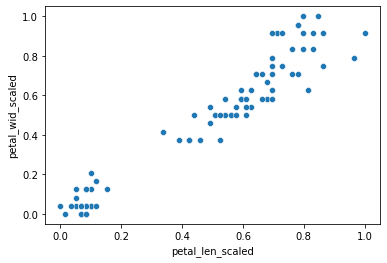

In [42]:
sns.scatterplot(x='petal_len_scaled',
                y='petal_wid_scaled',
                data=X_train)

In [43]:
# lets make a model

In [44]:
# make a thing:

In [45]:
clf = KNN(n_neighbors=4)

In [46]:
# fit the thing:

In [47]:
selected_cols = ['petal_len_scaled', 'petal_wid_scaled', 'sepal_len_scaled']

In [49]:
clf.fit(X_train[selected_cols], y_train['species'])

KNeighborsClassifier(n_neighbors=4)

In [50]:
# get predictions:
y_train_pred = clf.predict(X_train[selected_cols])

In [51]:
accuracy_score(y_train.species,
              y_train_pred)

0.9523809523809523

In [52]:
validate.head()

,sepal_len,sepal_wid,petal_len,petal_wid,species
6,5.4,3.9,1.7,0.4,setosa
29,5.2,3.4,1.4,0.2,setosa
34,5.5,4.2,1.4,0.2,setosa
47,5.1,3.8,1.6,0.2,setosa
114,5.7,2.5,5.0,2.0,virginica


In [53]:
# separate X and y
val_x, val_y = validate.drop(columns='species'), validate[['species']]

In [54]:
# apply my scaler from before

In [55]:
scaled_col_names

['sepal_len_scaled',
 'sepal_wid_scaled',
 'petal_len_scaled',
 'petal_wid_scaled']

In [56]:
val_x[scaled_col_names] = myscaler.transform(val_x)

In [57]:
val_x.head()

,sepal_len,sepal_wid,petal_len,petal_wid,sepal_len_scaled,sepal_wid_scaled,petal_len_scaled,petal_wid_scaled
6,5.4,3.9,1.7,0.4,0.323529,0.791667,0.118644,0.125000
29,5.2,3.4,1.4,0.2,0.264706,0.583333,0.067797,0.041667
34,5.5,4.2,1.4,0.2,0.352941,0.916667,0.067797,0.041667
47,5.1,3.8,1.6,0.2,0.235294,0.750000,0.101695,0.041667
114,5.7,2.5,5.0,2.0,0.411765,0.208333,0.677966,0.791667


In [58]:
# use my model for prediction on validate set:

In [60]:
y_val_pred = clf.predict(val_x[selected_cols])

In [61]:
accuracy_score(val_y, y_val_pred)

0.9444444444444444